<a href="https://colab.research.google.com/github/otitamario/sp-pa-gep/blob/main/notebooks/exp4_constrained_problem.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Clone the repository into Colab runtime
!git clone https://github.com/otitamario/sp-pa-gep.git

# Move into repo root
%cd sp-pa-gep

# Make sure Python sees the project root
import sys
import os

# Move to repo root if needed
if not os.path.exists("src"):
    %cd sp-pa-gep

sys.path.append(".")

Cloning into 'sp-pa-gep'...
remote: Enumerating objects: 78, done.
remote: Counting objects: 100% (78/78), done.
remote: Compressing objects: 100% (63/63), done.
remote: Total 78 (delta 26), reused 34 (delta 7), pack-reused 0 (from 0)
Receiving objects: 100% (78/78), 574.78 KiB | 15.53 MiB/s, done.
Resolving deltas: 100% (26/26), done.
/content/sp-pa-gep


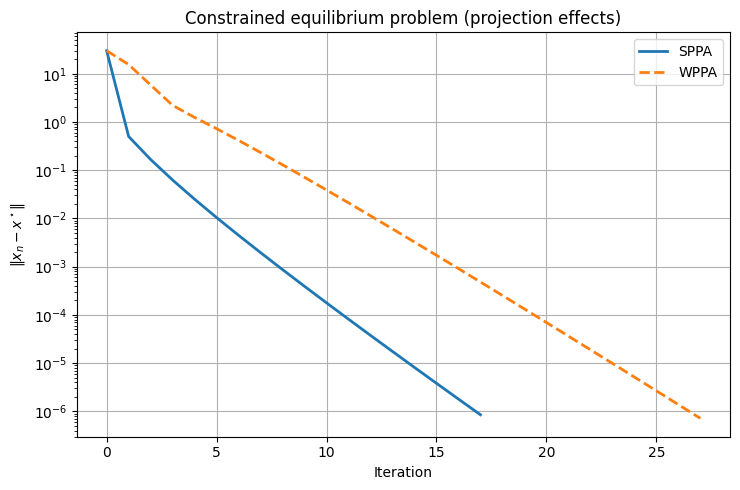

In [2]:
# Experiment 4: Constrained problem (projection effects)

import numpy as np
import matplotlib.pyplot as plt

from src.algorithms import SPPA, WPPA
from src.utils import norm


# Projection onto unit ball
def proj_unit_ball(x):
    nrm = np.linalg.norm(x)
    if nrm <= 1.0:
        return x
    return x / nrm


# Resolvent with projection
def resolvent_projected(x, r):
    return proj_unit_ball(x / (1.0 + r))


# Problem parameters
n = 100
x_star = np.zeros(n)
x0 = 3.0 * np.ones(n)   # start outside feasible set
u = np.zeros(n)

r = 1.0
N = 500
alpha_seq = [1.0 / (k + 2) for k in range(N)]


# Run algorithms
hist_sppa = SPPA(x0, u, alpha_seq, r, resolvent_projected)
hist_wppa = WPPA(x0, alpha_seq, r, resolvent_projected)


# Errors
err_sppa = [norm(x - x_star) for x in hist_sppa]
err_wppa = [norm(x - x_star) for x in hist_wppa]


# Plot
plt.figure(figsize=(7.5, 5))
plt.semilogy(err_sppa, label="SPPA", linewidth=2)
plt.semilogy(err_wppa, label="WPPA", linestyle="--", linewidth=2)

plt.xlabel("Iteration")
plt.ylabel(r"$\|x_n - x^\star\|$")
plt.title("Constrained equilibrium problem (projection effects)")
plt.legend()
plt.grid(True)
plt.tight_layout()

# SAVE FIRST
plt.savefig("figures/exp4_constrained_projection.png",
            dpi=300, bbox_inches="tight")

# THEN SHOW
plt.show()
